# Arboles de Regresión

In [20]:
import pandas as pd
from sklearn.tree import export_graphviz
import os
from graphviz import Source

In [2]:
data = pd.read_csv("../datasets/boston/Boston.csv")

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [6]:
colsname = data.columns.values.tolist()
predictors = colsname[:13]
target= colsname[13]
x= data[predictors]
y= data[target]

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
regtree= DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=20,max_depth=8,random_state=0)

In [64]:
regtree.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [65]:
preds = regtree.predict(data[predictors])

In [66]:
data["Predicciones"] = preds

In [67]:
data[["Predicciones","medv"]]

,Predicciones,medv
0,24.703704,24.0
1,23.176923,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,28.671429,22.4
502,24.703704,20.6
503,28.978261,23.9
504,24.703704,22.0


# Visualización

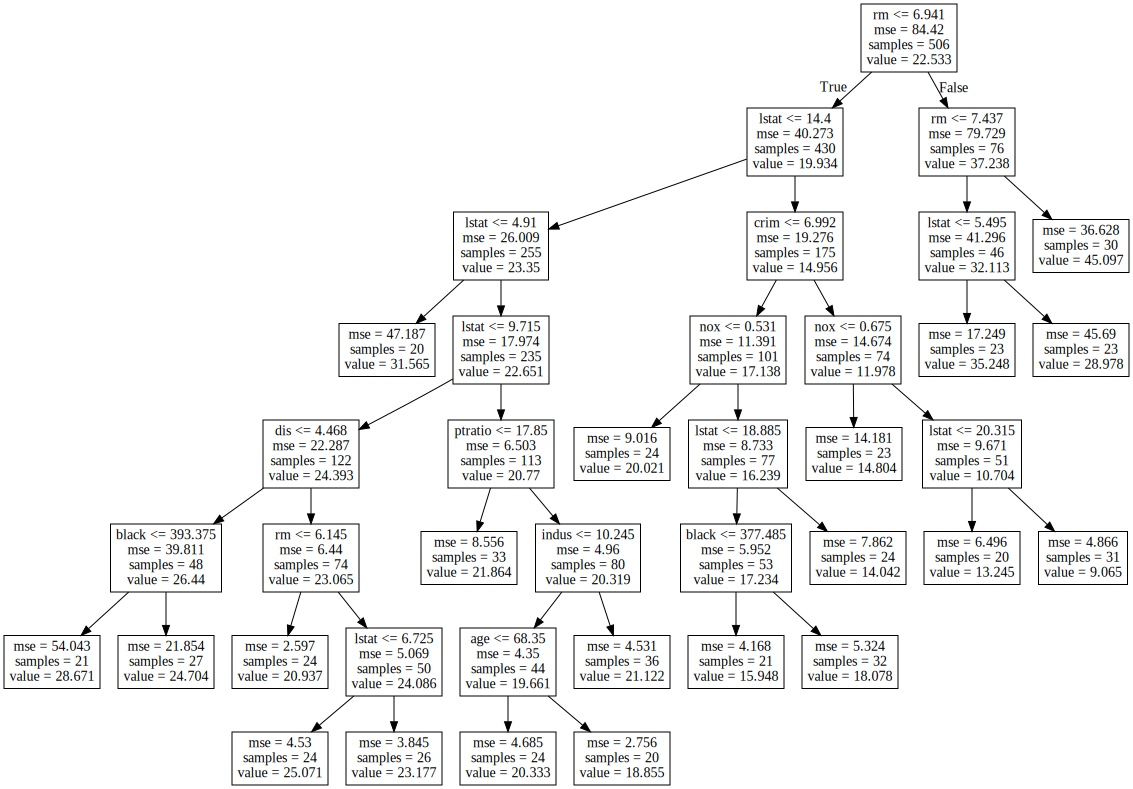

In [68]:
with open("./Recursos/Boston_regtree.dot","w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names= predictors)  ## feature_names que ocupe los nombres de..
    dotfile.close()
file = open("Recursos/Boston_regtree.dot","r")
text = file.read()
Source(text)

# Validación

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [70]:
cv= KFold(n_splits=20, shuffle=True, random_state=1)
cv= cv.get_n_splits(x.shape[0])
scores= -cross_val_score(regtree, x, y, scoring="neg_mean_squared_error",cv=cv , n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[  7.13917176  11.36885456  10.24511322  12.10908866   6.66649963
  14.61759973  26.15266178  31.52600636  22.42953947  10.21267671
  57.74873738  14.52569945  10.79099411  21.51708066 184.24357696
  18.37711368  33.08178139  12.94766712   7.7574574   28.68941727]
27.107336864009135


In [71]:
list(zip(predictors,regtree.feature_importances_)) # se ve mejor la imporancia de cada variable

[('crim', 0.03216115405678307),
 ('zn', 0.0),
 ('indus', 0.0011954344192559407),
 ('chas', 0.0),
 ('nox', 0.01494347544665608),
 ('rm', 0.6382747327397984),
 ('age', 0.0006744930993108715),
 ('dis', 0.00938063923286765),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.001577476048705214),
 ('black', 0.00688919268340892),
 ('lstat', 0.2949034022732139)]

# Random Forests

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
forest = RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=10000)
forest.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

Los parámetros:

n_jobs: se utiliza para especificar una paralelización en el pc.

oob_score= True hace un muestreo aleatorio que lo hace el metodo.

n_stimators : numero de arboles que se generaran

In [86]:
data["rforest"]=forest.oob_prediction_
data[["rforest","medv"]]

,rforest,medv
0,28.467755,24.0
1,22.621601,21.6
2,34.554097,34.7
3,34.713412,33.4
4,34.350634,36.2
...,...,...
501,24.193222,22.4
502,18.828711,20.6
503,27.508284,23.9
504,26.129571,22.0


In [87]:
data["rforest_error2"] = (data["rforest"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)   # esto nos entrega el score

10.190037899786267

In [88]:
forest.oob_score_   ## es un R^2

0.879292922590875

**Al aumentar la cantidad de arboles disminuimos el score y aumentamos el R^2**

* Random Forest no necesita una validación  cruzada ni una poda
* LLega un momento en que se aplana la curva de mejora el modelo